((-3.0, 3.0), (-2.0, 2.0))
Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
Epoch: 600; Error: 0.0;
Epoch: 700; Error: 0.0;
Epoch: 800; Error: 0.0;
Epoch: 900; Error: 0.0;
Epoch: 1000; Error: 0.0;
The maximum number of train epochs is reached


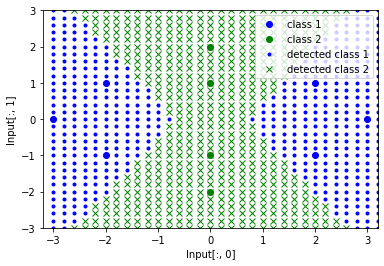

In [4]:
import numpy as np
import neurolab as nl

# Create train samples
input = np.array([[-3, 0], [-2, 1], [-2, -1], [0, 2], [0, 1], [0, -1], [0, -2], 
                                                        [2, 1], [2, -1], [3, 0]])
target = np.array([[1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], 
                                                        [1, 0], [1, 0], [1, 0]])
print(nl.tool.minmax(input))
# Create network with 2 layers:4 neurons in input layer(Competitive)
# and 2 neurons in output layer(liner)
# net = nl.net.newlvq(nl.tool.minmax(input), 4, [.6, .4])
net = nl.net.newlvq(((-3.0, 3.0), (-2.0, 2.0)), 4, [.6, .4])
# Train network
error = net.train(input, target, epochs=1000, goal=-1)

# Plot result
import pylab as pl
xx, yy = np.meshgrid(np.arange(-3, 3.4, 0.2), np.arange(-3, 3.4, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
i = np.concatenate((xx, yy), axis=1)
o = net.sim(i)
grid1 = i[o[:, 0]>0]
grid2 = i[o[:, 1]>0]

class1 = input[target[:, 0]>0]
class2 = input[target[:, 1]>0]

pl.plot(class1[:,0], class1[:,1], 'bo', class2[:,0], class2[:,1], 'go')
pl.plot(grid1[:,0], grid1[:,1], 'b.', grid2[:,0], grid2[:,1], 'gx')
pl.axis([-3.2, 3.2, -3, 3])
pl.xlabel('Input[:, 0]')
pl.ylabel('Input[:, 1]')
pl.legend(['class 1', 'class 2', 'detected class 1', 'detected class 2'])
pl.show()

Epoch: 100; Error: 0.0;
The maximum number of train epochs is reached


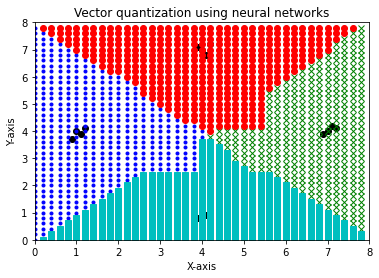

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# Define input data
input_file = 'data_vq.txt'
input_text = np.loadtxt(input_file)
data = input_text[:, 0:2]
labels = input_text[:, 2:]

# Define a neural network with 2 layers:
# 10 neurons in input layer and 4 neurons in output layer
net = nl.net.newlvq(nl.tool.minmax(data), 10, [0.25, 0.25, 0.25, 0.25])

# Train the neural network
error = net.train(data, labels, epochs=100, goal=-1)

# Create the input grid
xx, yy = np.meshgrid(np.arange(0, 8, 0.2), np.arange(0, 8, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
input_grid = np.concatenate((xx, yy), axis=1)

# Evaluate the input grid of points
output_grid = net.sim(input_grid)

# Define the 4 classes
class1 = data[labels[:,0] == 1]
class2 = data[labels[:,1] == 1]
class3 = data[labels[:,2] == 1]
class4 = data[labels[:,3] == 1]

# Define grids for all the 4 classes
grid1 = input_grid[output_grid[:,0] == 1]
grid2 = input_grid[output_grid[:,1] == 1]
grid3 = input_grid[output_grid[:,2] == 1]
grid4 = input_grid[output_grid[:,3] == 1]

# Plot outputs 
plt.plot(class1[:,0], class1[:,1], 'ko', class2[:,0], class2[:,1], 'ko', 
                class3[:,0], class3[:,1], 'ko', class4[:,0], class4[:,1], 'ko')
plt.plot(grid1[:,0], grid1[:,1], 'b.', grid2[:,0], grid2[:,1], 'gx',
                grid3[:,0], grid3[:,1], 'cs', grid4[:,0], grid4[:,1], 'ro')
plt.axis([0, 8, 0, 8])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Vector quantization using neural networks')

plt.show()